# Data analysis on IPL Matches

## History on Dataset

### Expectaion from the Data Analysis

### Questions to be answered:

Import Packages

In [2]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization
import pandas_profiling

In [3]:
df_matches = pd.read_csv(r'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv')

In [4]:
profile = pandas_profiling.ProfileReport(df_matches)
profile.to_file(outputfile="IPL_Match.html")

In [80]:
df_matches.shape

(696, 18)

In [24]:
df_matches.info

<bound method DataFrame.info of        id  season       city        date                        team1  \
0       1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1       2    2017       Pune  2017-04-06               Mumbai Indians   
2       3    2017     Rajkot  2017-04-07                Gujarat Lions   
3       4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4       5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
5       6    2017  Hyderabad  2017-04-09                Gujarat Lions   
6       7    2017     Mumbai  2017-04-09        Kolkata Knight Riders   
7       8    2017     Indore  2017-04-10  Royal Challengers Bangalore   
8       9    2017       Pune  2017-04-11             Delhi Daredevils   
9      10    2017     Mumbai  2017-04-12          Sunrisers Hyderabad   
10     11    2017    Kolkata  2017-04-13              Kings XI Punjab   
11     12    2017  Bangalore  2017-04-14  Royal Challengers Bangalore   
12     13    2017  

In [10]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [74]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
How many matches we’ve got in the dataset?

In [25]:
df_matches['id'].count()

696

In [ ]:
How many seasons we’ve got in the dataset?

In [26]:
df_matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

In [16]:
len(df_matches['season'].unique())

11

In [ ]:
Which Team had won by maximum runs?

In [17]:
df_matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
Interested only in the winning team

In [27]:
df_matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
Which Team had won by maximum wickets?

In [28]:
df_matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [ ]:
Which Team had won by minimum runs?

In [29]:
df_matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [ ]:
Number of matches based on seasons

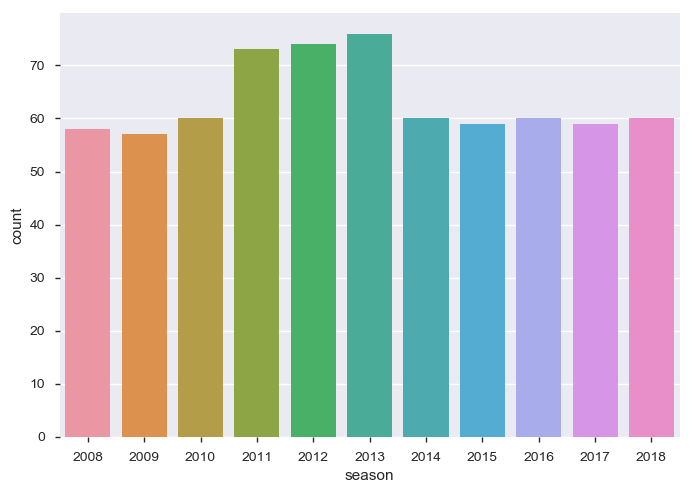

In [10]:
sns.countplot(x='season',data=df_matches)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

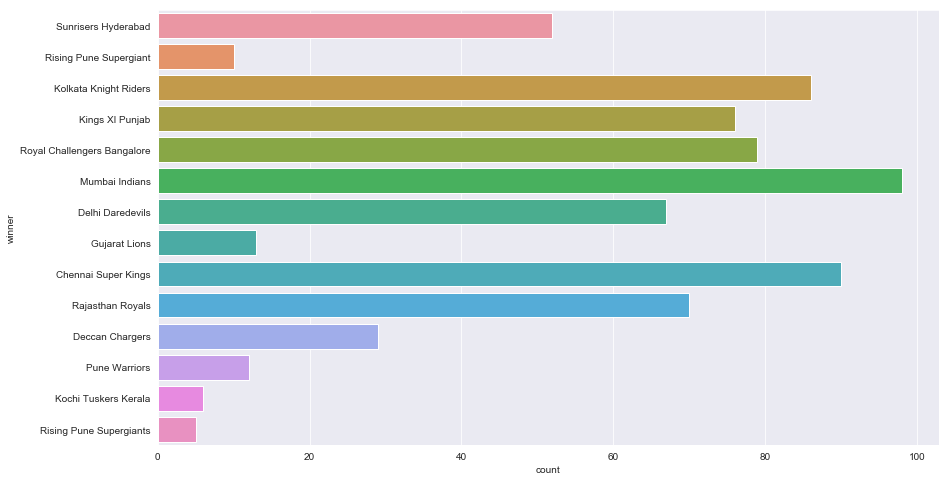

In [78]:
sns.countplot(y='winner', data = df_matches)
plt.show

In [ ]:
Top player of the match

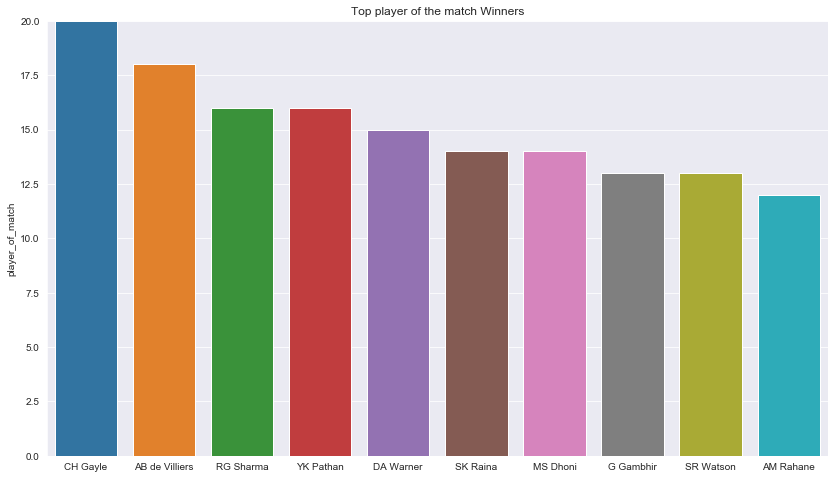

In [44]:
top_players = df_matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x = top_players.index, y = top_players, orient='v')
plt.show()

In [46]:
result = df_matches['toss_winner'] == df_matches['winner']
result.groupby(result).size()

False    339
True     357
dtype: int64

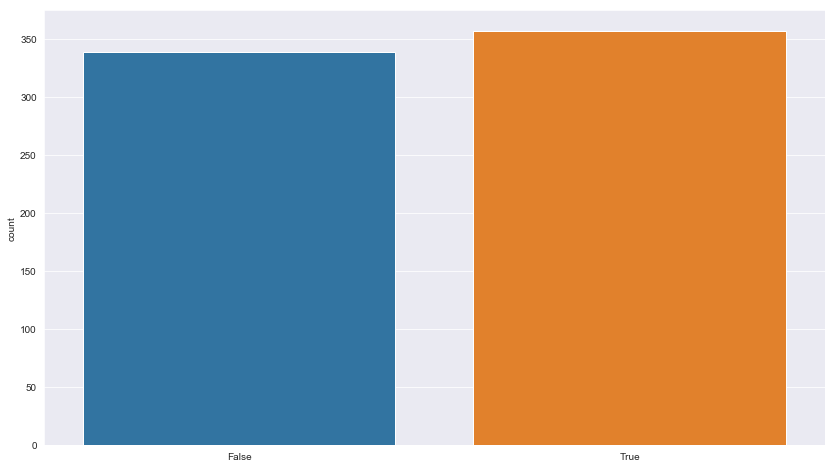

In [47]:
sns.countplot(result)

In [ ]:
Toss-winning team opted for Bat/Field - Season wise

Text(0.5, 0, 'Count')

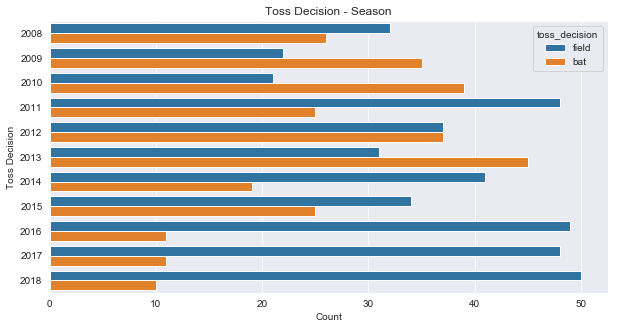

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(hue='toss_decision', y='season', data= df_matches)
plt.title('Toss Decision - Season')
plt.ylabel('Toss Decision')
plt.xlabel('Count')

In [ ]:
Toss-winning team opted for Bat/Field - Team wise

Text(0, 0.5, 'Team Name')

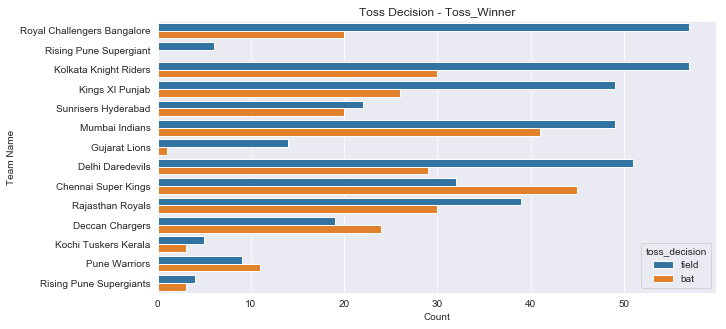

In [66]:
plt.figure(figsize = (10,5))
sns.countplot(hue='toss_decision', y='toss_winner', data= df_matches)
plt.title('Toss Decision - Toss_Winner')
plt.xlabel('Count')
plt.ylabel('Team Name')

In [ ]:
Match Result

Text(0, 0.5, 'Match Count')

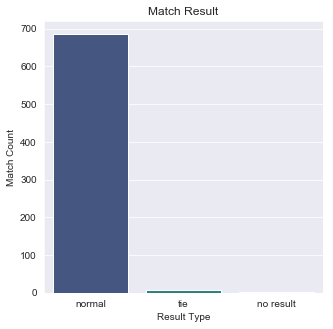

In [58]:
plt.figure(figsize = (5,5))
sns.countplot(x='result', data= df_matches, palette= 'viridis')
plt.title('Match Result')
plt.xlabel('Result Type')
plt.ylabel('Match Count')

Text(0, 0.5, 'Team')

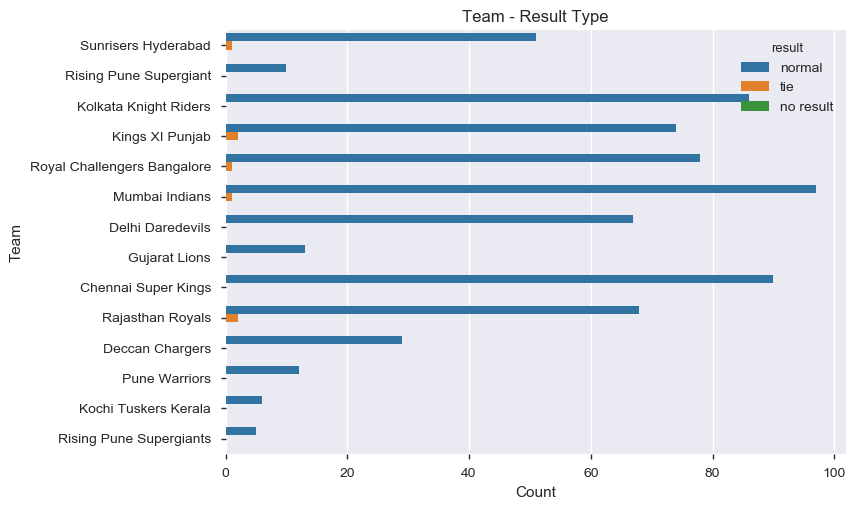

In [5]:
plt.figure()
sns.countplot(hue='result', y='winner',data= df_matches)
plt.title('Team - Result Type')
plt.xlabel('Count')
plt.ylabel('Team')



In [8]:
df_matches.loc[df_matches['result']=='normal'].sum()

id                                                            674407
season                                                       1380892
date               2017-04-052017-04-062017-04-072017-04-082017-0...
team1              Sunrisers HyderabadMumbai IndiansGujarat Lions...
team2              Royal Challengers BangaloreRising Pune Supergi...
toss_winner        Royal Challengers BangaloreRising Pune Supergi...
toss_decision      fieldfieldfieldfieldbatfieldfieldbatfieldfield...
result             normalnormalnormalnormalnormalnormalnormalnorm...
dl_applied                                                        19
winner             Sunrisers HyderabadRising Pune SupergiantKolka...
win_by_runs                                                     9377
win_by_wickets                                                  2331
player_of_match    Yuvraj SinghSPD SmithCA LynnGJ MaxwellKM Jadha...
venue              Rajiv Gandhi International Stadium, UppalMahar...
dtype: object